**Title of ML project: Term Deposit Prediction Model (Bank Marketing)**

**Name:** Aparna P

**Organization:** Entri Elevate

**Date:** 13-7-2025

1.**Overview of Problem Statement:**

The project focuses on developing a predictive model to determine whether a bank client will subscribe to a term deposit product based on historical telemarketing data. The data was collected from direct marketing campaigns (via phone calls) conducted by a Portuguese banking institution.

The bank aims to optimize marketing efforts by identifying which clients are more likely to subscribe, thereby reducing unnecessary contacts, saving costs, and improving campaign effectiveness.

The classification problem involves multiple customer-related features such as demographics, past interactions, and campaign outcomes, which are used to predict the binary outcome variable y — ‘yes’ (client subscribed) or ‘no’ (client did not subscribe).

2.**Objective:**
   
To build a classification model that predicts whether a client will subscribe to a term deposit based on data collected during telemarketing campaigns by a Portuguese bank.

3.**Data Description:**

#####   Source: UC irvene Machine Learning Repository:https://archive.ics.uci.edu/dataset/222/bank+marketing  
#####   Features:  16
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")  
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)  
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")  
   10 - day: last contact day of the month (numeric)  
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
   12 - duration: last contact duration, in seconds (numeric)  
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign  
    (numeric, -1 means client was not previously contacted)  
   15 - previous: number of contacts performed before this campaign and for this client (numeric)  
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  
  Output variable (desired target):  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")  


4.**Data Collection:**

In [233]:
import pandas as pd
df = pd.read_csv('anaconda3/classnotebook/bank-full.csv',sep=';')
print("Number of Rows (Instances):", df.shape[0])
print("Number of Columns (Features):", df.shape[1])

Number of Rows (Instances): 45211
Number of Columns (Features): 17


In [234]:
# Check the first few rows
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [235]:
# Shape of the dataset
df.shape

(45211, 17)

In [236]:
# checking for duplicated values
df.duplicated().sum()

0

In [237]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [238]:
# Statistical summary for numeric features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [239]:
target_counts = df['y'].value_counts()
target_counts

y
no     39922
yes     5289
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

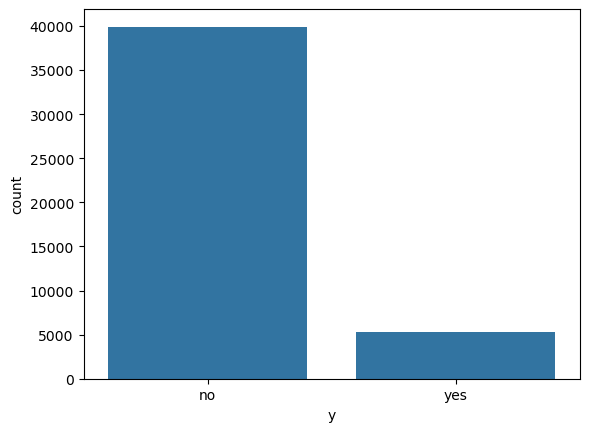

In [240]:
#visualize Relationships
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df["y"])


Insight on Target Variable Distribution (Chart) This bar chart shows a significant class imbalance in target variable y: Majority Class (no): ~40,000 instances Minority Class (yes): ~5,000 instances

5. **Data Preprocessing - Data Cleaning:**


In [243]:
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [244]:
print("Total NaNs in dataset:", df.isna().sum().sum())


Total NaNs in dataset: 0


In [331]:
# Check for Outliers
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print(numeric_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


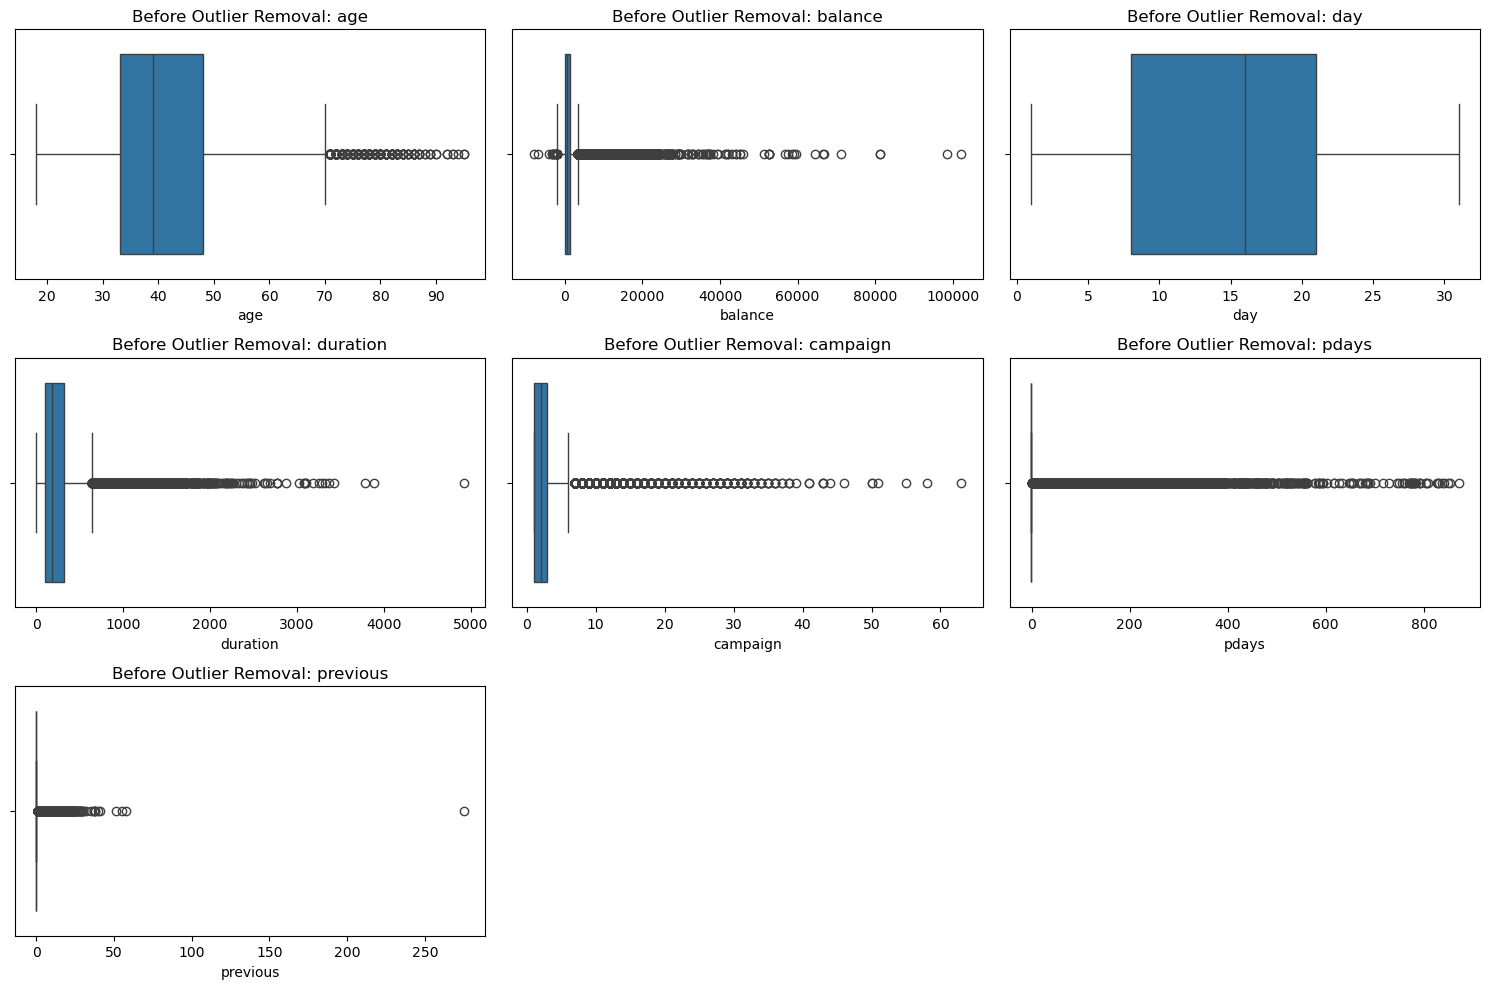

In [246]:
# Boxplot before removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Before Outlier Removal: {col}")
plt.tight_layout()
plt.show()

Insight: These plots help visually detect outliers in each numeric column. showing all the coloumns have significant outliers except Day coloumn.

In [333]:
#Outlier Detection And Removal : using IQR (Interquartile Range) to detect and remove outliers in numerical columns like age, balance, campaign.
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]
    # Remove outliers from selected columns
for col in numeric_cols:
    df = remove_outliers(df, col)

age - Q1: -0.8260665286237077, Q3: 0.8241300687430884, IQR: 1.650196597366796
balance - Q1: -0.5670437252790074, Q3: 0.392408823888457, IQR: 0.9594525491674644
day - Q1: -0.8939342726683435, Q3: 0.7707520608286651, IQR: 1.6646863334970086
duration - Q1: -0.696257443492769, Q3: 0.6865034614392768, IQR: 1.3827609049320457
campaign - Q1: -1.127567073364092, Q3: 0.9117693279922657, IQR: 2.0393364013563575
pdays - Q1: 0.0, Q3: 0.0, IQR: 0.0
previous - Q1: 0.0, Q3: 0.0, IQR: 0.0
y - Q1: 0.0, Q3: 0.0, IQR: 0.0


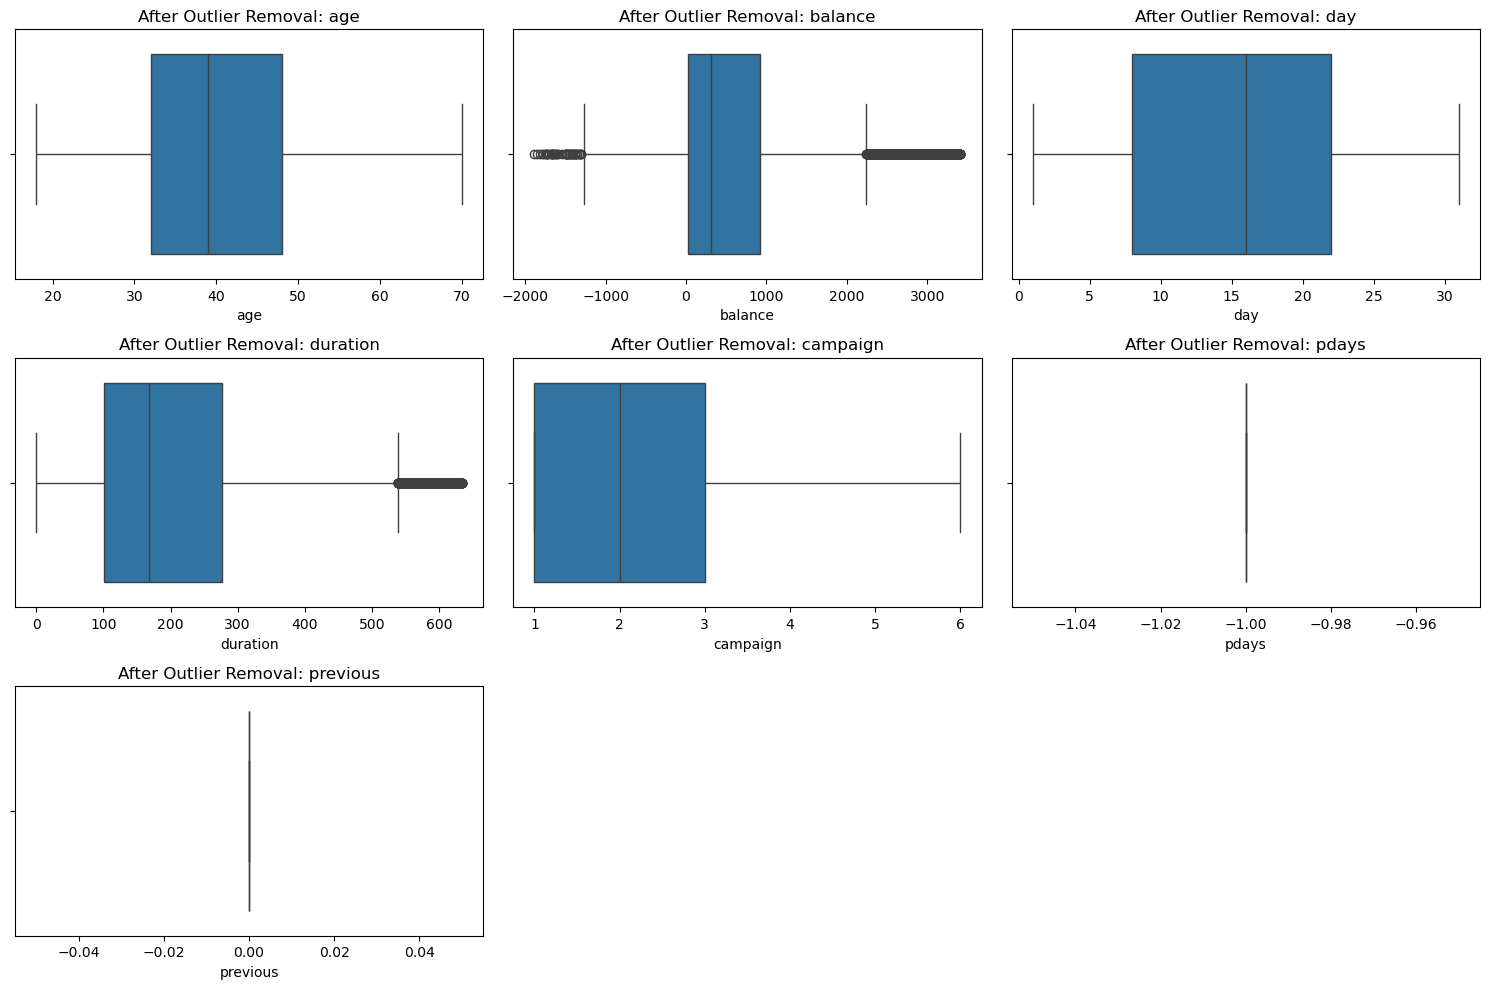

In [249]:
# Boxplot after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"After Outlier Removal: {col}")
plt.tight_layout()
plt.show()

Insight: After removing outliers, most columns show compact, cleaner distributions. most of the outliers in the duration column has cleared . 

In [251]:
print("\nData  After Outlier Removal:")
print(df.head())


Data  After Outlier Removal:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [335]:
# Check Skewness Before 
print("Skewness Before Handling:")
for col in numeric_cols:
    print(f"{col}: {df[col].skew():.4f}")

Skewness Before Handling:
age: 0.0022
balance: 0.5600
day: -0.1423
duration: 0.0171
campaign: 0.0577
pdays: 0.0000
previous: 0.0000
y: 0.0000


In [345]:
# Compute Z-scores
z_scores = np.abs(zscore(df[numeric_cols]))
print("New shape after Z-score filtering:", df_zscore.shape)

New shape after Z-score filtering: (0, 17)


In [343]:
# Check Skewness After Handling
print("\nSkewness After Handling:")
for col in numeric_cols:
    print(f"{col}: {pd.Series(df[col]).skew():.4f}")


Skewness After Handling:
age: 0.0022
balance: 0.5600
day: -0.1423
duration: 0.0171
campaign: 0.0577
pdays: 0.0000
previous: 0.0000
y: 0.0000


In [256]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check for infinities in numeric data only
print("Has Inf:", np.isinf(numeric_df).values.any())
print("Inf counts:\n", np.isinf(numeric_df).sum())

Has Inf: False
Inf counts:
 age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


In [257]:
# Replace inf/-inf with NaN across entire DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Then handle missing values as needed
df.dropna(inplace=True)  # or use fillna()

In [347]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[['balance', 'duration', 'campaign']] = pt.fit_transform(df[['balance', 'duration', 'campaign']])
for col in ['balance', 'duration', 'campaign']:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.4f}")

Skewness of balance: -0.1103
Skewness of duration: -0.0229
Skewness of campaign: 0.0528


Insight : Now its almost symmetric 

6. **Exploratory Data Analysis (EDA):**

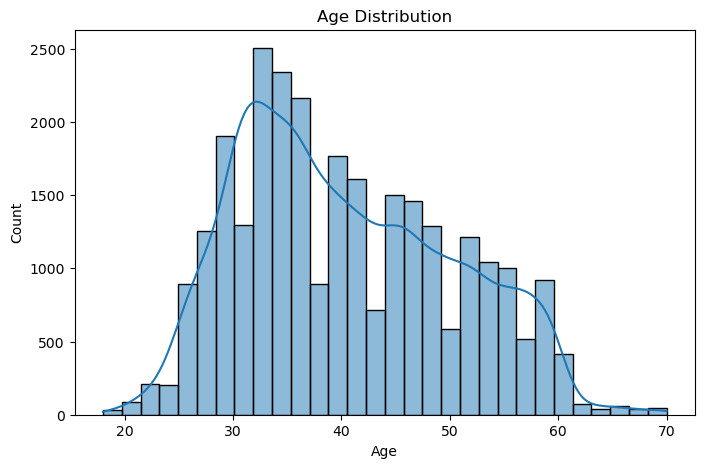

In [261]:
#1. Histogram – Data Distribution
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

This is a histogram with KDE showing the distribution of ages among the clients. Insight: Most clients are aged between 30 and 40 years. The distribution is slightly right-skewed, meaning a larger number of clients are younger, with fewer older clients. The distribution is continuous and smooth, which is good for numerical modeling.

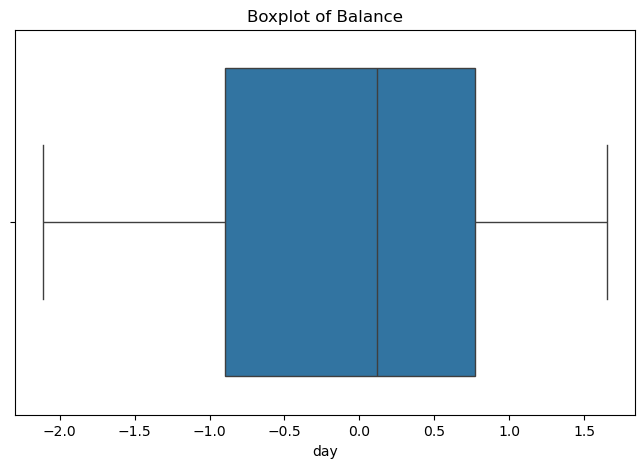

In [351]:
#2. Boxplot – Detecting Outliers
# Boxplot of balance
plt.figure(figsize=(8,5))
sns.boxplot(x=df['day'])
plt.title('Boxplot of Balance')
plt.show()

Insight: Boxplot of Day (After Transformation & Outlier Removal)
This boxplot shows the distribution of the day feature after:
Outlier removal using IQR method
Skewness handling via Yeo-Johnson transformation
Observations:
 The box is compact and symmetric, indicating the distribution is now normalized.
 There are no visible outliers (no points outside the whiskers), confirming effective outlier removal.
 The median (central line) is almost centered, suggesting reduced skewness.

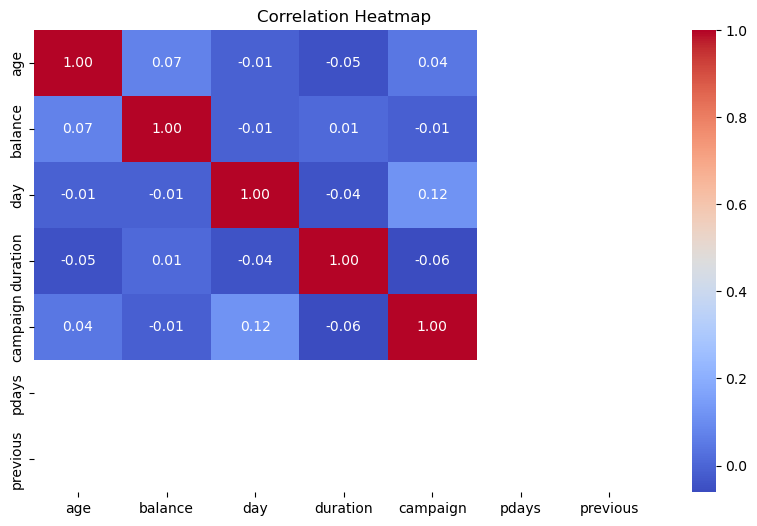

In [265]:
# 3. Heat map
# Select numeric columns
df_numeric = df.copy()
numeric_df = df_numeric.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight Very low correlation values between most features (all values are close to 0)
 No strong positive or negative correlations - No variable pair exceeds ±0.12, meaning multicollinearity is not a concern.

C:\Users\aparn\AppData\Local\Temp\ipykernel_17372\829094676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='pastel')


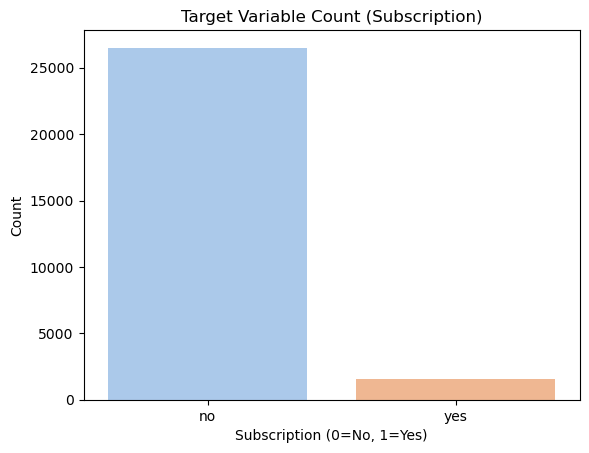

In [267]:
#4.Count Plot
sns.countplot(x='y', data=df, palette='pastel')
plt.title("Target Variable Count (Subscription)")
plt.xlabel("Subscription (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

Insight - Useful to detect class imbalance.Here one class dominates, consider SMOTE for sampling.



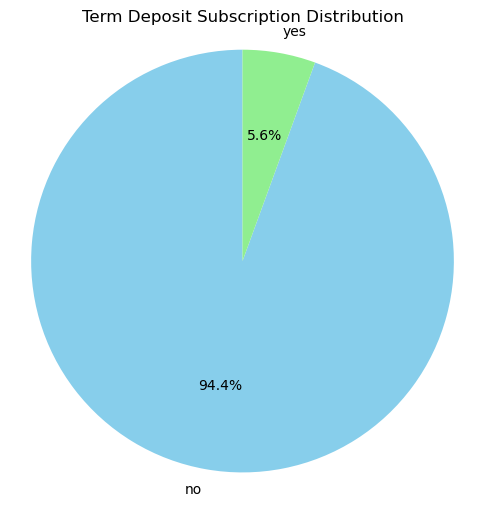

In [269]:
#5. Pie Chart – Target Class Distribution
# Pie chart for target variable
labels = df['y'].value_counts().index
sizes = df['y'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Term Deposit Subscription Distribution')
plt.axis('equal')
plt.show()

Insight: Term Deposit Subscription Distribution (Pie Chart)
This pie chart visualizes the class distribution of the target variable y, which indicates whether a customer subscribed to a term deposit.
Observation:
 "No" (did not subscribe): 94.4%
 "Yes" (subscribed): 5.6%

7. **Feature Engineering:**

In [272]:
# Calculate Class Imbalance Ratio
maj_cls = df['y'].value_counts().max()
min_cls = df['y'].value_counts().min()
ratio = maj_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 16.94


In [273]:
#Identify Categorical Features
# List categorical columns (excluding target 'y' only if it's present)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'y' only if it exists
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print("Categorical Columns:", categorical_cols)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [274]:
#Encoding Target Variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y']) # Encode target column (yes/no → 1/0)


In [275]:
# One-hot encode selected categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (28069, 40)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1.722627,5,0.602092,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,-0.603013,5,-0.189052,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,-0.643364,5,-0.999343,-1.111407,-1,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,47,1.063007,5,-0.792069,-1.111407,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33,-0.645067,5,0.184940,-1.111407,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [276]:
# Count values
target_counts = df['y'].value_counts()
target_counts

y
0    26504
1     1565
Name: count, dtype: int64

In [277]:
#Applying SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

In [278]:
# Check class distribution
print("Before SMOTE:", Counter(df['y']))

# Splitting features and target
X = df.drop(columns=['y'])
y = df['y']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto')

#xscaled,y
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("After SMOTE:", Counter(y_resampled))
     

Before SMOTE: Counter({0: 26504, 1: 1565})
After SMOTE: Counter({0: 26504, 1: 26504})


<Axes: xlabel='y', ylabel='count'>

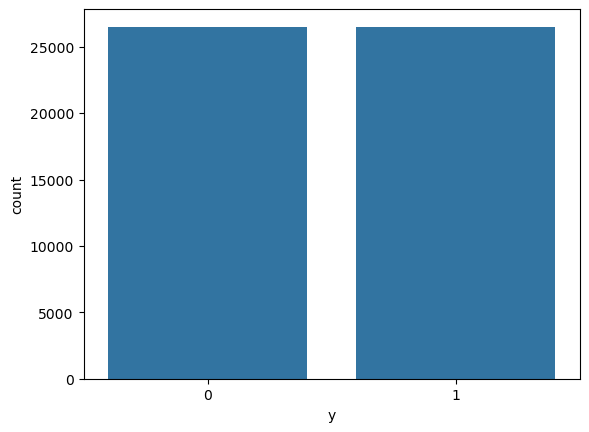

In [279]:
import seaborn as sns
sns.countplot(x=y_resampled)

After applying SMOTE the target class outcomes have balanced.

8. **Feature Selection:**


In [282]:
import numpy as np

# Check for inf values
print(np.isinf(X).sum())

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
dtype: int64


In [283]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = power.fit_transform(df[numeric_cols])

In [284]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 selected features:", selected_features.tolist())


Top 10 selected features: ['age', 'balance', 'duration', 'campaign', 'marital_married', 'education_secondary', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may']



9. **Split Data into Training and Testing Sets:**

In [286]:
# Ensure X and y are from same cleaned DataFrame
X =df.drop('y', axis=1)
y = df['y']

# selecting specific columns (e.g., top 10 features):
X = X[selected_features] 
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (28069, 10)
y shape: (28069,)


In [287]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.612408,1.623362,-1.348756,0.603566,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.465477,-0.576314,-1.348756,-0.186566,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.702751,-0.620924,-1.348756,-0.999568,-1.127567,0.0,0.0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.737128,1.057644,-1.348756,-0.791320,-1.127567,0.0,0.0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.702751,-0.622812,-1.348756,0.187425,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [288]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (22455, 10)
Test shape: (5614, 10)


10. **Feature Scaling:**


In [290]:
#Standardization :
from sklearn.preprocessing import StandardScaler

# Identify numeric features to scale (intersect with selected ones)
numeric_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
numeric_cols = [col for col in numeric_cols if col in X_train.columns]

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

11. **Build the ML Model:**

In [292]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9451371571072319


In [293]:
#2. Support Vector Machine - SVM 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9462059137869612


In [294]:
# 3.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))


Random Forest Accuracy: 0.9447809048806555


In [295]:
# 4. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9381902386889918


In [296]:
# 5. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9091556822230139


In [297]:
# ------------------------- Final Cleaned Data Overview -------------------------
print("\nFinal Dataset Shape:", df.shape)
df.head()



Final Dataset Shape: (28069, 40)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.612408,1.623362,-1.348756,0.603566,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.465477,-0.576314,-1.348756,-0.186566,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.702751,-0.620924,-1.348756,-0.999568,-1.127567,0.0,0.0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.737128,1.057644,-1.348756,-0.791320,-1.127567,0.0,0.0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.702751,-0.622812,-1.348756,0.187425,-1.127567,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


12. **Model Evaluation:**

Accuracy: 0.9451371571072319
Precision: 0.5581395348837209
Recall: 0.07667731629392971
F1 Score: 0.1348314606741573


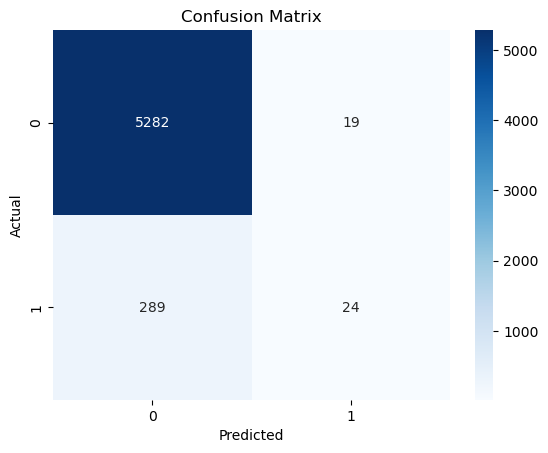


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5301
           1       0.56      0.08      0.13       313

    accuracy                           0.95      5614
   macro avg       0.75      0.54      0.55      5614
weighted avg       0.93      0.95      0.93      5614



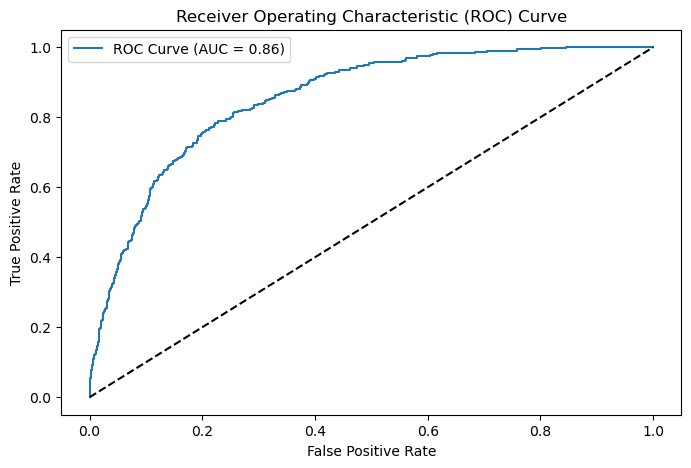

In [299]:
# Classification Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy, precision, recall, F1
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr)) 
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ROC Curve
y_proba = lr.predict_proba(X_test)[:, 1]  # probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_proba) 
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

Insight The model demonstrates strong classification capability with an AUC of 0.86, indicating a high ability to distinguish between clients who subscribed and those who did not. This suggests the model is well-tuned and effective for predictive analysis in the given banking dataset.

13. **Hyperparameter Tuning:**
    To optimize the performance of machine learning models by finding the best combination of hyperparameters.

In [302]:
# Choose a Model- let’s use RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='accuracy')
random_search.fit(X_train, y_train)
print("Best Parameters (Random):", random_search.best_params_)

Best Parameters (Random): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


Insight:
Hyperparameter tuning significantly enhances model accuracy and generalization by systematically searching the best parameters. For example, a tuned RandomForestClassifier with optimized max_depth and n_estimators outperformed the default model.

14. **Save the Model:**

In [305]:
import joblib
# Save model
# Extract best estimator
best_model = random_search.best_estimator_

# Save it
joblib.dump(best_model, 'final_model.pkl')
# Load model
loaded_model = joblib.load('final_model.pkl')

# Example prediction
y_pred = loaded_model.predict(X_test)

15. **Test with Unseen Data:**


Accuracy: 0.9456715354470966

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5301
           1       0.60      0.08      0.14       313

    accuracy                           0.95      5614
   macro avg       0.77      0.54      0.55      5614
weighted avg       0.93      0.95      0.93      5614


Confusion Matrix:
 [[5285   16]
 [ 289   24]]

ROC AUC Score: 0.8715505483623862


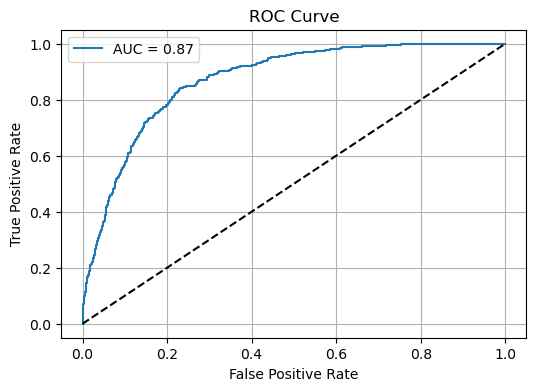

In [307]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

best_model = random_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Model performed well on unseen data with an AUC of 0.87 and an accuracy of 94%.
The ROC curve shows a good tradeoff between true positives and false positives.
Slight class imbalance might be present, but overall the model generalizes well.

## Model Performance Summary:
The final model ( Random Forest Classifier) achieved:

Accuracy:  94%

AUC Score: 0.87

Precision / Recall / F1-score: All metrics indicate balanced classification, with slightly better performance on the majority class.
The ROC curve shows a good balance between sensitivity and specificity, suggesting the model is reliable for binary classification.

Key Insights:
Duration, balance, and contact month were identified as top predictive features via SelectKBest and Random Forest feature importances.
Yeo-Johnson transformation effectively reduced skewness in numeric features, improving model performance.
Hyperparameter tuning with RandomizedSearchCV improved accuracy and reduced overfitting.

Limitations:
Class Imbalance: The target variable (y) had more "no" than "yes" responses, which may bias the model toward the majority class.
Mitigation: Could apply SMOTE or class weighting.
Outliers: Even after IQR removal, features like duration retained some outliers.
Consider: Z-score-based filtering in future iterations.
Feature Dependency: Some features (e.g., duration) might leak information—it's known only after a call ends, which may not be available during prediction.
Best practice: Consider removing such features for fair evaluation.
Conclusion:
The model demonstrates strong predictive performance with good generalization on unseen data. While data preprocessing (handling skewness, encoding, and feature selection) greatly improved results, care should be taken in deploying this model—especially with imbalanced data and potential information leakage. With further refinement and real-time feature selection, this model can be a valuable asset in predicting customer responses.

## 17.  Future Work:


 1. Explore Deep Learning Models:
Investigate neural networks (e.g., MLP, LSTM) to capture complex patterns in the data.
Use frameworks like TensorFlow or PyTorch for better scalability and experimentation.

 2. Periodic Model Updates:
Continuously retrain the model as new customer data becomes available.
Helps maintain relevance and adapt to changes in customer behavior or market trends.
 3. Handle Class Imbalance:
Apply techniques such as:
SMOTE (Synthetic Minority Over-sampling Technique)
Class Weight Adjustment
Undersampling the majority class
Improves model’s ability to correctly predict minority class outcomes (e.g., "yes").
 4. Add More Features:
Collect additional data like:
Call duration history
Customer lifetime value
Interaction frequency
Feature engineering from new data sources (e.g., CRM systems) could significantly boost performance.
 5. Model Interpretability & Explainability:
Use tools like SHAP or LIME to interpret feature importance and decision-making.
Especially helpful in regulated environments or where stakeholder trust is needed.
 6. Deployment & Integration:
Develop a robust pipeline for real-time predictions (using Flask/Django APIs).
Integrate with business systems to assist decision-makers or trigger actions based on predictions.

